20


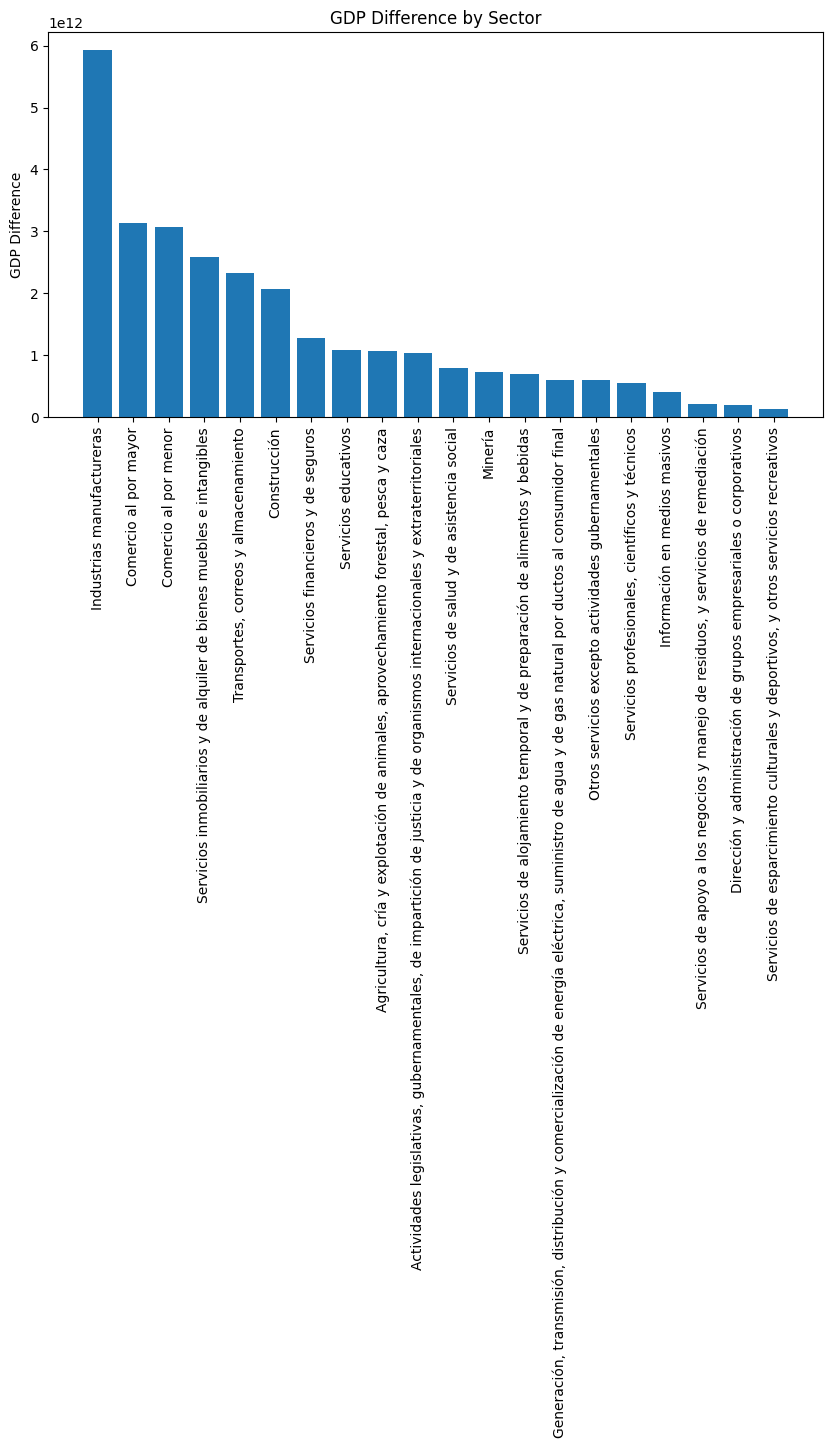

In [56]:
# Set dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Read CSV file
df = pd.read_csv('datasources/Producto-interno-bruto-anual.csv')

# Get count of unique sectors
print(df['Sector'].nunique())

# Sort by Sector and then Year descending
df_sorted = df.sort_values(by=['Sector', 'Year'])

# Group by sector and the gdp of the first year, and the gdp of the last year
df_grouped = df_sorted.groupby(['Sector'])
df_aux = df_grouped.agg({'GDP': ['first', 'last']})

# Have the dataframe have a column for the difference between the last year and the first year
df_aux['GDP Difference'] = df_aux['GDP']['last'] - df_aux['GDP']['first']

# Sort the dataframe by the GDP difference
df_aux_sorted = df_aux.sort_values(by='GDP Difference', ascending=False)


# Plot the data
plt.figure(figsize=(10, 5))
plt.bar(df_aux_sorted.index, df_aux_sorted['GDP Difference'])
plt.xticks(rotation=90)
plt.ylabel('GDP Difference')
plt.title('GDP Difference by Sector')
plt.show()